In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D , Input , Dense , Flatten , Dropout , GlobalMaxPooling2D,MaxPooling2D ,BatchNormalization

In [ ]:
cifar10 = tf.keras.datasets.cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 14s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

#flatten y_test and Y_train


In [ ]:
y_train,y_test = y_train.flatten() ,y_test.flatten()

In [ ]:
y_test.shape

(10000,)

In [ ]:
K = len(set(y_train))
print(K)

10


In [ ]:
i = Input(shape = x_train[0].shape)
x = Conv2D(32,(3,3) , activation='relu',padding = 'same')(i)
x = BatchNormalization()(x)
x = Conv2D(32,(3,3) , activation='relu',padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(64,(3,3), activation='relu',padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(64,(3,3) , activation='relu',padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(128,(3,3), activation='relu',padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(128,(3,3), activation='relu',padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax' )(x)

In [ ]:
from tensorflow.keras.models import Model

In [ ]:
model = Model(i,x)

In [ ]:
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs = 15)

Epoch 1/15
1563/1563 [==============================] - 17s 10ms/step - loss: 0.1349 - accuracy: 0.9556 - val_loss: 0.8292 - val_accuracy: 0.8160
Epoch 2/15
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1214 - accuracy: 0.9597 - val_loss: 0.7415 - val_accuracy: 0.8199
Epoch 3/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1153 - accuracy: 0.9619 - val_loss: 0.7144 - val_accuracy: 0.8271
Epoch 4/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1054 - accuracy: 0.9647 - val_loss: 0.7418 - val_accuracy: 0.8312
Epoch 5/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0995 - accuracy: 0.9670 - val_loss: 0.7879 - val_accuracy: 0.8304
Epoch 6/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0910 - accuracy: 0.9694 - val_loss: 0.7817 - val_accuracy: 0.8274
Epoch 7/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0866 - accuracy: 0.9711 - val_loss: 0.8384 - val_a

In [ ]:
#fit with data augementation 
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range = 0.1)
train_generator = data_generator.flow(x_train,y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit(train_generator,validation_data=(x_test,y_test),steps_per_epoch = steps_per_epoch,epochs = 15)

Epoch 1/15
1562/1562 [==============================] - 40s 26ms/step - loss: 0.0939 - accuracy: 0.9693 - val_loss: 0.6359 - val_accuracy: 0.8542
Epoch 2/15
1562/1562 [==============================] - 31s 20ms/step - loss: 0.0947 - accuracy: 0.9687 - val_loss: 0.7119 - val_accuracy: 0.8418
Epoch 3/15
1562/1562 [==============================] - 33s 21ms/step - loss: 0.0904 - accuracy: 0.9700 - val_loss: 0.6380 - val_accuracy: 0.8544
Epoch 4/15
1562/1562 [==============================] - 32s 20ms/step - loss: 0.0864 - accuracy: 0.9717 - val_loss: 0.6771 - val_accuracy: 0.8518
Epoch 5/15
1562/1562 [==============================] - 32s 20ms/step - loss: 0.0881 - accuracy: 0.9707 - val_loss: 0.7617 - val_accuracy: 0.8470
Epoch 6/15
1562/1562 [==============================] - 32s 20ms/step - loss: 0.0899 - accuracy: 0.9712 - val_loss: 0.6208 - val_accuracy: 0.8425
Epoch 7/15
1562/1562 [==============================] - 33s 21ms/step - loss: 0.0836 - accuracy: 0.9727 - val_loss: 0.7307 -

In [ ]:
labels = '''airplane automobile

bird

cat

deer

dog

frog

horse ship

truck'''.split()

Text(0.5, 1.0, 'true label : truck predicted = ship')

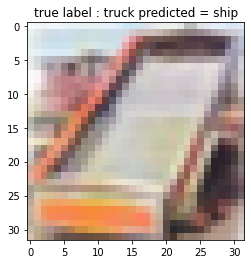

In [ ]:

import numpy as np
p_test = model.predict(x_test).argmax(axis = 1)
misclassified = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified)
plt.imshow(x_test[i],cmap = 'gray')
plt.title('true label : %s predicted = %s'%(labels[y_test[i]],labels[p_test[i]]))

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

TypeError: ignored

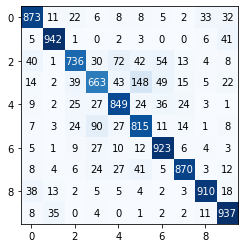

In [ ]:
mat= confusion_matrix(y_test, p_test)
plot_confusion_matrix (conf_mat=mat)

In [ ]:
y_test, p_test

(array([3, 8, 8, ..., 5, 1, 7], dtype=uint8), array([3, 8, 8, ..., 5, 1, 7]))